In [6]:
import pandas as pd
from statsmodels.distributions.empirical_distribution import ECDF

In [7]:
df = pd.read_csv('mustang_release_v1.0beta.csv')

In [9]:
df

,user_ID,group_ID,submit_time,start_time,end_time,wallclock_limit,job_status,node_count,tasks_requested
0,351,354,2011-10-27 10:50:10-06:00,2011-10-27 11:49:02-06:00,2011-10-27 11:50:36-06:00,365 days 00:00:00.000000000,CANCELLED,1,24
1,351,354,2011-10-27 11:50:46-06:00,2011-10-27 11:51:06-06:00,2011-10-27 11:51:13-06:00,365 days 00:00:00.000000000,COMPLETED,1,24
2,287,288,2011-10-27 12:02:50-06:00,2011-10-27 12:03:08-06:00,2011-10-27 12:03:13-06:00,365 days 00:00:00.000000000,COMPLETED,1,24
3,287,288,2011-10-27 12:02:29-06:00,2011-10-27 12:02:36-06:00,2011-10-27 12:03:14-06:00,365 days 00:00:00.000000000,COMPLETED,1,24
4,351,354,2011-10-27 12:02:26-06:00,2011-10-27 12:02:36-06:00,2011-10-27 12:03:18-06:00,365 days 00:00:00.000000000,COMPLETED,800,19200
5,351,354,2011-10-27 13:41:52-06:00,2011-10-27 13:41:54-06:00,2011-10-27 13:42:02-06:00,365 days 00:00:00.000000000,COMPLETED,1,24
6,354,357,2011-10-27 15:34:44-06:00,2011-10-27 15:35:11-06:00,2011-10-27 15:36:47-06:00,365 days 00:00:00.000000000,COMPLETED,1,24
7,354,357,2011-10-27 15:38:14-06:00,2011-10-27 15:38:17-06:00,2011-10-27 15:38:20-06:00,0 days 02:00:00.000000000,COMPLETED,2,48
8,354,357,2011-10-27 15:54:40-06:00,2011-10-27 15:54:49-06:00,2011-10-27 15:56:01-06:00,365 days 00:00:00.000000000,COMPLETED,1,24
9,354,357,2011-10-27 15:56:03-06:00,2011-10-27 15:56:22-06:00,2011-10-27 15:57:08-06:00,365 days 00:00:00.000000000,COMPLETED,1,24


In [10]:
tstart = pd.to_datetime(df['start_time'])
tsubmit = pd.to_datetime(df['submit_time'])
tend = pd.to_datetime(df['end_time'])

In [11]:
tdiff = (tstart - tsubmit)
trun = (tend - tstart)

In [12]:
tdiff[0].seconds

3532

In [13]:
tdiff.apply(lambda x: x.seconds)

0           3532.0
1             20.0
2             18.0
3              7.0
4             10.0
5              2.0
6             27.0
7              3.0
8              9.0
9             19.0
10             3.0
11             4.0
12            15.0
13            17.0
14            28.0
15            31.0
16            12.0
17            28.0
18            27.0
19             7.0
20             8.0
21             9.0
22             9.0
23             8.0
24             9.0
25            24.0
26            25.0
27            10.0
28            25.0
29            10.0
            ...   
2113145      400.0
2113146     2381.0
2113147       12.0
2113148       12.0
2113149       12.0
2113150     2306.0
2113151     2320.0
2113152     6020.0
2113153     3667.0
2113154       60.0
2113155       10.0
2113156    24702.0
2113157        3.0
2113158    25659.0
2113159       12.0
2113160       12.0
2113161       10.0
2113162        8.0
2113163    11102.0
2113164       10.0
2113165     3570.0
2113166     

In [14]:
df['twait_seconds'] = tdiff.apply(lambda x: x.seconds)

In [15]:
df['trun_seconds'] = trun.apply(lambda x: x.seconds)

In [16]:
df

,user_ID,group_ID,submit_time,start_time,end_time,wallclock_limit,job_status,node_count,tasks_requested,twait_seconds,trun_seconds
0,351,354,2011-10-27 10:50:10-06:00,2011-10-27 11:49:02-06:00,2011-10-27 11:50:36-06:00,365 days 00:00:00.000000000,CANCELLED,1,24,3532.0,94.0
1,351,354,2011-10-27 11:50:46-06:00,2011-10-27 11:51:06-06:00,2011-10-27 11:51:13-06:00,365 days 00:00:00.000000000,COMPLETED,1,24,20.0,7.0
2,287,288,2011-10-27 12:02:50-06:00,2011-10-27 12:03:08-06:00,2011-10-27 12:03:13-06:00,365 days 00:00:00.000000000,COMPLETED,1,24,18.0,5.0
3,287,288,2011-10-27 12:02:29-06:00,2011-10-27 12:02:36-06:00,2011-10-27 12:03:14-06:00,365 days 00:00:00.000000000,COMPLETED,1,24,7.0,38.0
4,351,354,2011-10-27 12:02:26-06:00,2011-10-27 12:02:36-06:00,2011-10-27 12:03:18-06:00,365 days 00:00:00.000000000,COMPLETED,800,19200,10.0,42.0
5,351,354,2011-10-27 13:41:52-06:00,2011-10-27 13:41:54-06:00,2011-10-27 13:42:02-06:00,365 days 00:00:00.000000000,COMPLETED,1,24,2.0,8.0
6,354,357,2011-10-27 15:34:44-06:00,2011-10-27 15:35:11-06:00,2011-10-27 15:36:47-06:00,365 days 00:00:00.000000000,COMPLETED,1,24,27.0,96.0
7,354,357,2011-10-27 15:38:14-06:00,2011-10-27 15:38:17-06:00,2011-10-27 15:38:20-06:00,0 days 02:00:00.000000000,COMPLETED,2,48,3.0,3.0
8,354,357,2011-10-27 15:54:40-06:00,2011-10-27 15:54:49-06:00,2011-10-27 15:56:01-06:00,365 days 00:00:00.000000000,COMPLETED,1,24,9.0,72.0
9,354,357,2011-10-27 15:56:03-06:00,2011-10-27 15:56:22-06:00,2011-10-27 15:57:08-06:00,365 days 00:00:00.000000000,COMPLETED,1,24,19.0,46.0


In [17]:
(df['twait_seconds']/60.0).describe()

count    2.019005e+06
mean     4.497529e+01
std      1.632296e+02
min      0.000000e+00
25%      1.666667e-01
50%      2.500000e-01
75%      5.850000e+00
max      1.439950e+03
Name: twait_seconds, dtype: float64

In [18]:
import matplotlib.pyplot as plt

In [19]:
%matplotlib inline

In [20]:
X=df['node_count']
Y=df['twait_seconds']

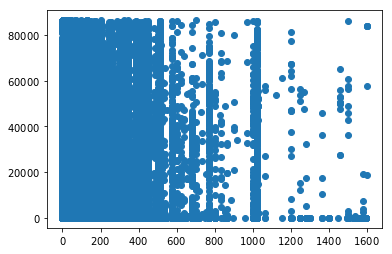

In [21]:
plt.scatter(X,Y)

In [145]:
cdf = df[df['job_status']=='COMPLETED']

In [159]:
cdf = cdf[cdf['twait_seconds']/cdf['trun_seconds'] < 2.0]

In [160]:
cdf = cdf[cdf['trun_seconds'] != 0]

In [161]:
cdf = cdf[cdf['trun_seconds'] > 300.0]

In [162]:
cdf = cdf[cdf['trun_seconds'] < 3600.0*24]

In [163]:
frac_wait = cdf['twait_seconds']/cdf['trun_seconds']

In [164]:
frac_wait.describe()

count    731890.000000
mean          0.219222
std           0.405429
min           0.000000
25%           0.016886
50%           0.029412
75%           0.180328
max           1.999878
dtype: float64

In [165]:
fwait_cdf = ECDF(frac_wait)

Text(0,0.5,'CDF')

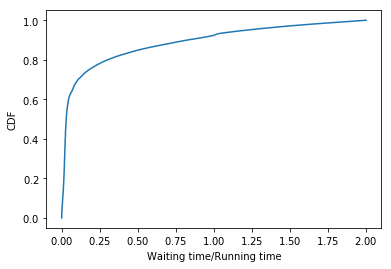

In [166]:
plt.plot(fwait_cdf.x, fwait_cdf.y)
plt.xlabel("Waiting time/Running time")
plt.ylabel("CDF")

In [127]:
efficiency = cdf['trun_seconds']/(cdf['trun_seconds']+cdf['twait_seconds'])

In [128]:
efficiency.describe()

count    731890.000000
mean          0.877183
std           0.176938
min           0.333347
25%           0.847222
50%           0.971429
75%           0.983395
max           1.000000
dtype: float64

In [129]:
cdf['trun_seconds'].describe()

count    731890.000000
mean       3875.113468
std        9810.348355
min         301.000000
25%         446.000000
50%         532.000000
75%        1286.000000
max       82989.000000
Name: trun_seconds, dtype: float64

In [130]:
import numpy as np

(0.1, 1.0)

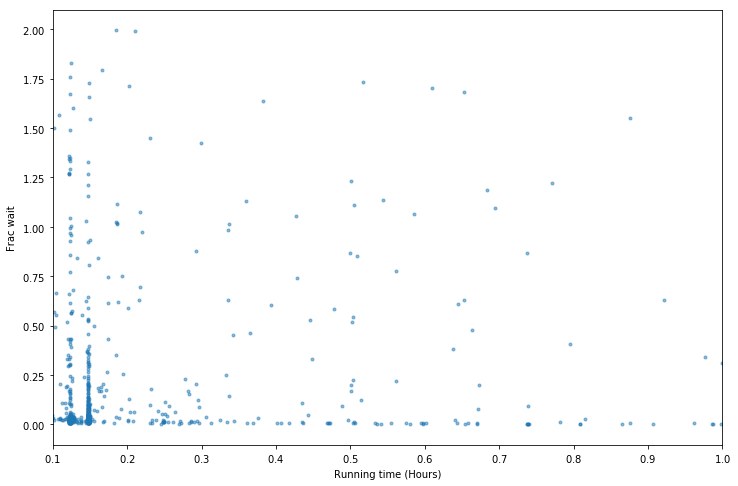

In [182]:
sampled_cdf = cdf.sample(1000)
fig, ax = plt.subplots()

fig.set_size_inches((12,8))
ax.scatter(sampled_cdf['trun_seconds']/3600.0, sampled_cdf['twait_seconds']/sampled_cdf['trun_seconds'],marker='.',alpha=0.5)
ax.set_xlabel("Running time (Hours)")
ax.set_ylabel("Frac wait")
ax.set_xlim((0.1,1.0))


(0, 100)

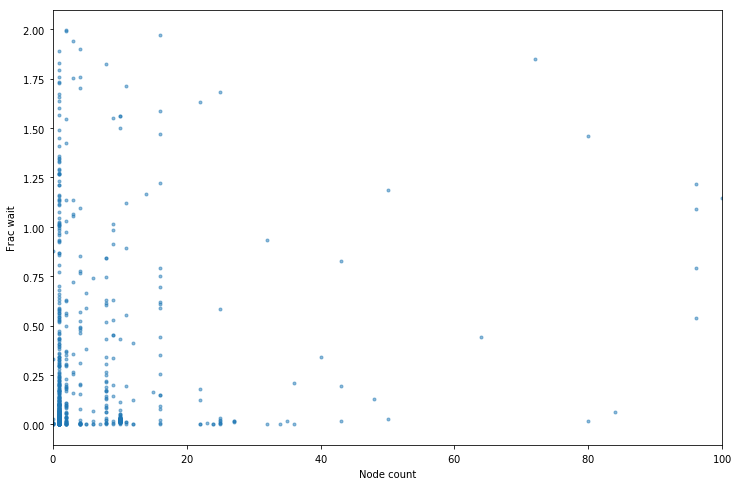

In [184]:
fig, ax = plt.subplots()

fig.set_size_inches((12,8))
ax.scatter(sampled_cdf['node_count'], sampled_cdf['twait_seconds']/sampled_cdf['trun_seconds'],marker='.',alpha=0.5)
ax.set_xlabel("Node count")
ax.set_ylabel("Frac wait")
ax.set_xlim((0,100))
#ax.set_xlim((0.1,1.0))


Text(0,0.5,'twait/trun')

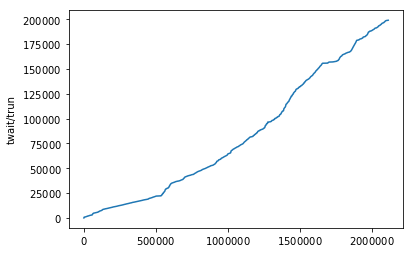

In [91]:
plt.plot(np.cumsum(frac_wait))
plt.ylabel("twait/trun")

Text(0,0.5,'R/R+W')

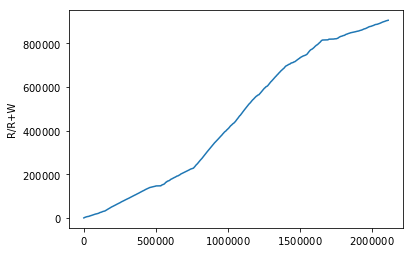

In [92]:
plt.plot(np.cumsum(efficiency))
plt.ylabel("R/R+W")

In [93]:
#Want the average waiting time for jobs of length smaller than t 

In [94]:
scdf = cdf.sort_values(by=['trun_seconds'])

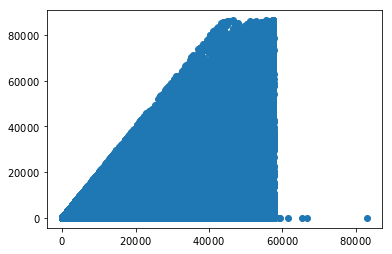

In [95]:
plt.scatter(scdf['trun_seconds'], scdf['twait_seconds'])

In [96]:
cumulative_twait_mean = scdf['twait_seconds'].rolling(window=len(scdf), min_periods=1).mean()

In [134]:
expanding_twait_mean = scdf['twait_seconds'].expanding(min_periods=1).mean()

In [135]:
expanding_twait_mean.describe()

count    1.021832e+06
mean     7.623240e+01
std      1.272342e+02
min      8.666667e+00
25%      1.805055e+01
50%      4.455953e+01
75%      5.477781e+01
max      8.963226e+02
Name: twait_seconds, dtype: float64

Text(0,0.5,'Average waiting time (cumulative) hours')

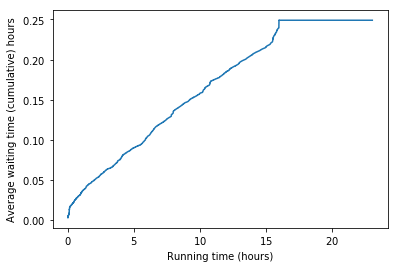

In [97]:
plt.plot(scdf['trun_seconds']/3600.0, cumulative_twait_mean/3600.0)
plt.xlabel("Running time (hours)")
plt.ylabel("Average waiting time (cumulative) hours")

(0, 5)

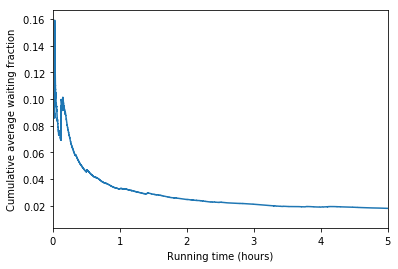

In [136]:
plt.plot(scdf['trun_seconds']/3600.0, expanding_twait_mean/scdf['trun_seconds'])
plt.xlabel("Running time (hours)")
plt.ylabel("Cumulative average waiting fraction")
plt.xlim((0,5))

In [104]:
pd.cut(cdf['trun_seconds'], np.arange(0,30*3600,3600))

10              (0, 3600]
12              (0, 3600]
13              (0, 3600]
16              (0, 3600]
18              (0, 3600]
19              (0, 3600]
20              (0, 3600]
21           (3600, 7200]
22           (3600, 7200]
23              (0, 3600]
24              (0, 3600]
25              (0, 3600]
26              (0, 3600]
27              (0, 3600]
28              (0, 3600]
29              (0, 3600]
30              (0, 3600]
31              (0, 3600]
32              (0, 3600]
33              (0, 3600]
34              (0, 3600]
35              (0, 3600]
36              (0, 3600]
37              (0, 3600]
38              (0, 3600]
39              (0, 3600]
40              (0, 3600]
41              (0, 3600]
42              (0, 3600]
43              (0, 3600]
                ...      
2113064         (0, 3600]
2113065    (14400, 18000]
2113067    (25200, 28800]
2113068    (25200, 28800]
2113070    (25200, 28800]
2113072         (0, 3600]
2113073         (0, 3600]
2113074    (

In [108]:
bucketized = cdf['twait_seconds'].groupby(pd.cut(cdf['trun_seconds'], np.arange(0,30*3600,3600))).mean()

In [112]:
bucketized

trun_seconds
(0, 3600]             117.102220
(3600, 7200]         1776.526339
(7200, 10800]        3895.304746
(10800, 14400]       5365.097590
(14400, 18000]       6836.895191
(18000, 21600]       6496.896524
(21600, 25200]      10389.556743
(25200, 28800]       8943.059145
(28800, 32400]      10951.417682
(32400, 36000]       9186.735203
(36000, 39600]      11895.384061
(39600, 43200]      11544.037175
(43200, 46800]      13764.563358
(46800, 50400]      12110.895459
(50400, 54000]      14583.483241
(54000, 57600]      18788.718918
(57600, 61200]         25.000000
(61200, 64800]         29.000000
(64800, 68400]         26.000000
(68400, 72000]               NaN
(72000, 75600]               NaN
(75600, 79200]               NaN
(79200, 82800]               NaN
(82800, 86400]         24.000000
(86400, 90000]               NaN
(90000, 93600]               NaN
(93600, 97200]               NaN
(97200, 100800]              NaN
(100800, 104400]             NaN
Name: twait_seconds, dtype: fl